NAMA : RIZKI WAHYU

NIM : 20220801019

**contoh pengolahan data menggunakan Machine Learning untuk prediksi churn pelanggan (yaitu apakah pelanggan akan berhenti menggunakan layanan atau tidak) dalam konteks e-commerce.**

**1. Membuat Dataset dengan Array**

Dataset ini akan berisi beberapa fitur seperti jumlah total pembelian, nilai rata-rata pembelian, frekuensi kunjungan, lama keanggotaan, dan target (churn atau tidak churn).

In [ ]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Simulate dataset with arrays
data = {
    'customer_id': np.arange(1, 11),  # Simulating 10 customers
    'total_purchase': [500, 700, 300, 1000, 200, 350, 450, 800, 250, 600],  # Total purchase
    'avg_purchase_value': [50, 70, 30, 100, 20, 35, 45, 80, 25, 60],  # Average purchase value
    'visit_frequency': [5, 10, 3, 15, 2, 7, 6, 12, 4, 9],  # Number of visits
    'membership_length': [2, 5, 1, 6, 1.5, 3, 4, 7, 2.5, 5.5],  # Membership length in years
    'churn': [0, 0, 1, 0, 1, 1, 0, 0, 1, 0]  # 0 = not churn, 1 = churn
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,customer_id,total_purchase,avg_purchase_value,visit_frequency,membership_length,churn
0,1,500,50,5,2.0,0
1,2,700,70,10,5.0,0
2,3,300,30,3,1.0,1
3,4,1000,100,15,6.0,0
4,5,200,20,2,1.5,1
5,6,350,35,7,3.0,1
6,7,450,45,6,4.0,0
7,8,800,80,12,7.0,0
8,9,250,25,4,2.5,1
9,10,600,60,9,5.5,0


**2. Preprocessing Data**

menyiapkan data untuk model machine learning, termasuk pemisahan antara fitur (X) dan target (y), serta melakukan scaling pada fitur numerik.

In [16]:
# Select features (X) and target (y)
X = df[['total_purchase', 'avg_purchase_value', 'visit_frequency', 'membership_length']]
y = df['churn']

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**3. Membagi Data Menjadi Data Latih dan Uji**

membagi dataset kecil ini menjadi data latih (training) dan data uji (testing).

In [15]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**4. Melatih Model Machine Learning**

menggunakan model Random Forest untuk memprediksi apakah pelanggan akan churn atau tidak.

In [17]:
# Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**5. Prediksi dan Evaluasi Model**

melakukan prediksi pada data uji dan mengevaluasi performa model.

In [18]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Show detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



**6. Confusion Matrix**

digunakan untuk mengidentifikasi hasil prediksi dengan lebih jelas.

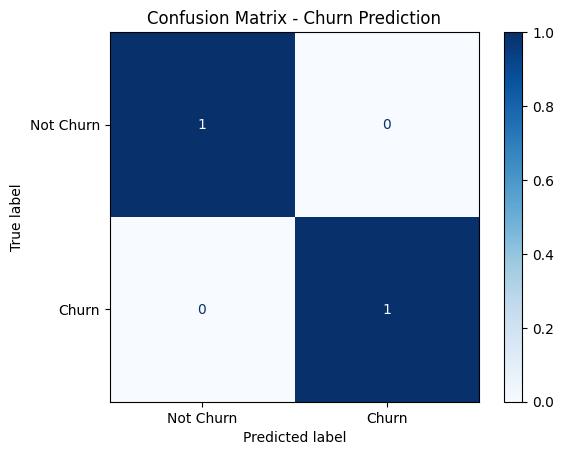

In [19]:
# Import necessary libraries for confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churn', 'Churn'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Churn Prediction')
plt.show()